In [21]:
# create text file with proper format and rounded
# this is dirty code and just surfes the purpose

from math import log10, floor

outputfile = "out.txt"

infile = open("sample.txt", "r")
f = open(outputfile, "w")
edited_data = []

# replace "," with "." and make it a float
for line in infile.readlines():
    modified_line = float(line.replace(",", "."))
    edited_data.append(modified_line)
    
edited_data.sort()

for i in edited_data:
    one_data_point = str(i) + "\n"
    f.write(one_data_point)
    
infile.close()
f.close()



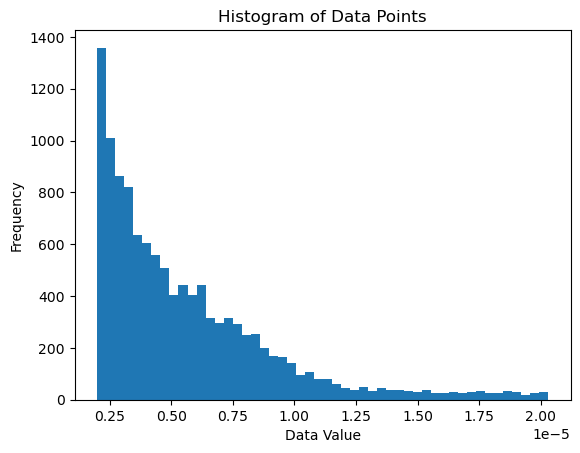

In [9]:
# create histogramm

import matplotlib.pyplot as plt
import pandas as pd

# Load the data, assuming it is in a single column with no header
data = pd.read_csv("out.txt", header=None)

# Plot the histogram
# data[0] selects the first (and only) column of your data
plt.hist(data[0], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of Data Points')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

plt.show()

Fitted lambda: 292874.653423128
Fitted n_0: 2188.3590785696492
3.4144299901407278e-06


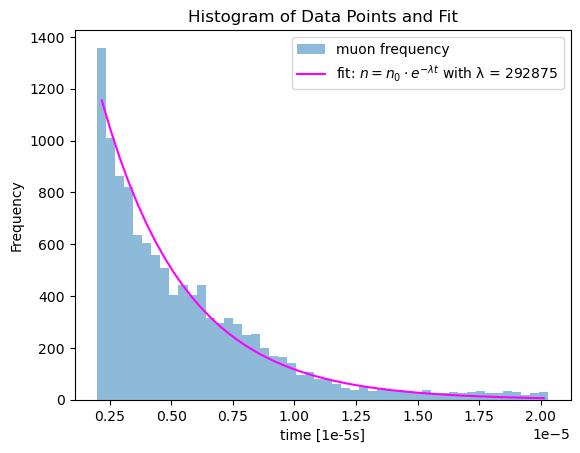

In [18]:
# fits n0 and lambda


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Load your data
data = pd.read_csv("out.txt", header=None)

# Calculate the histogram
counts, bin_edges = np.histogram(data[0], bins='auto')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define the fit function
def fit_func(t, lambada, n_0):
    return n_0 * np.exp(-lambada * t)

# Perform the curve fitting
popt, pcov = curve_fit(fit_func, bin_centers, counts, p0=[1, max(counts)])

print(f"Fitted lambda: {popt[0]}")
print(f"Fitted n_0: {popt[1]}")


# Plot the histogram
plt.hist(data[0], bins=bin_edges, alpha=0.5, label='muon frequency')

# Plot the fit
plt.plot(bin_centers, fit_func(bin_centers, *popt), label=r'fit: $n = n_0 \cdot e^{-\lambda t}$ with λ = %s' % (round(popt[0])), color="fuchsia")

print(1/popt[0])

plt.title('Histogram of Data Points and Fit')
plt.xlabel('time [1e-5s]')
plt.ylabel('Frequency')
plt.legend()

plt.show()


Fitted lambda: 292874.79025158833
mean lifetime: 3.4144283949498337e-06
standard deviation of lamda: 4319.289011958083


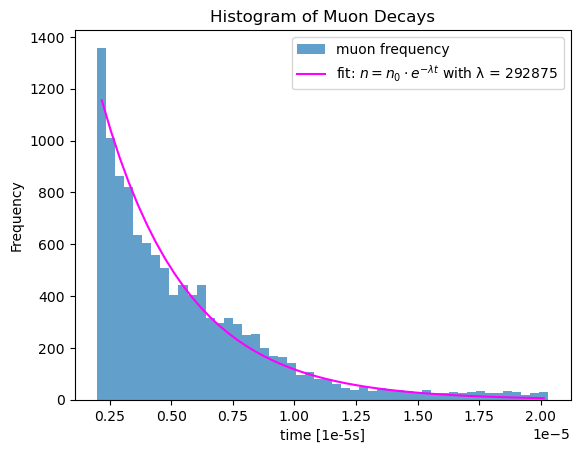

In [20]:
# only fits lambda, n0 is defined

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


# Definieren Sie 'n_0' als den maximalen Wert von 'counts', oder setzen Sie es auf einen bekannten Wert
n_0_fixed = 2188.3590785696492
#print(max(counts))

# Definieren Sie die Fit-Funktion mit 'n_0' als konstantem Wert
def fit_func(t, lambada):
    return n_0_fixed * np.exp(-lambada * t)

# Führen Sie das Curve Fitting nur für 'lambada' durch
popt, pcov = curve_fit(fit_func, bin_centers, counts, p0=[1])

# 'popt' enthält nun nur den Wert für 'lambada'
lambada_fitted = popt[0]

print(f"Fitted lambda: {lambada_fitted}")
print(f"mean lifetime: {1/lambada_fitted}")
print(f"standard deviation of lamda: {np.sqrt(np.diag(pcov))[0]}")


# Plot the histogram
plt.hist(data[0], bins=bin_edges, alpha=0.7, label='muon frequency')

# Plot the fit
plt.plot(bin_centers, fit_func(bin_centers, *popt), label=r'fit: $n = n_0 \cdot e^{-\lambda t}$ with λ = %s' % (round(lambada_fitted)), color="fuchsia")

plt.title('Histogram of Muon Decays')
plt.xlabel('time [1e-5s]')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('histogramm.pdf')
plt.show()



In [24]:
# standard deviation of lambada
std_dev_lambada = np.sqrt(np.diag(pcov))[0]

n = 1
delta_stat_lambda = std_dev_lambada/np.sqrt(n)

def error_propagation(lammbda, stat_lambda):
    return (1 / lammbda**2 ) * stat_lambda

print("lambada_fitted:", lambada_fitted)
print(f"Standard deviation of lambda: {std_dev_lambada}")
print("statistical error of lambda", delta_stat_lambda)
print("statistical error of 1/lambda:", error_propagation(lambada_fitted, delta_stat_lambda))

lambada_fitted: 292874.79025158833
Standard deviation of lambda: 4319.289011958083
statistical error of lambda 4319.289011958083
statistical error of 1/lambda: 5.03556589345078e-08
